<a href="https://colab.research.google.com/github/wusinyee/Machine-Learning-Projects-All-Type-/blob/main/Final_Project_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection: Analysis and Model Development**

## Supervised Machine Learning: Classification Module 6 Final Project


## **Table of contents**

<br>1.	Introduction</br>
<br>2.	Main Objective</br>
<br>3.	Dataset Description</br>
<br>4.	Data Exploration and Preprocessing</br>
<br>  4.1 Exploratory Data Analysis</br>
<br>   4.2 Data Preprocessing and Feature Engineering</br>
<br>  4.3 Additional Feature Engineering</br>
<br>5.	Model Training and Comparison</br>
<br>  5.1. Logistic Regression Results</br>
<br>  5.2 Random Forest Results</br>
<br>  5.3 XGBoost Results</br>
<br>  5.4 Model Comparison Analysis</br>
<br>  5.5 Interpreting ROC-AUC Scores</br>
<br>  5.6 Visualizing Precision-Recall Tradeoff</br>
<br>6.	Recommended Model</br>
<br>7.	Key Findings and Insights</br>
<br>8.	Model Limitations and Next Steps</br>
<br>9.	Conclusion</br>

## **2. Main Objective**

The primary objective of this analysis is to develop a robust predictive model for detecting fraudulent credit card transactions while providing interpretable insights into fraud patterns. Our focus is dual:


1.   Prediction: Create a high-accuracy model to identify potential fraudulent transactions in real-time.
2.   Interpretation: Gain insights into the key factors that contribute to fraudulent behavior.


**Benefits to stakeholders:**


*   Financial: Significant reduction in losses from fraudulent activities
*   Customer Trust: Enhanced fraud protection leading to improved customer satisfaction and loyalty.
*   Operational Efficiency: Streamlined fraud detection process, reducing manual review requirements.
*   Strategic Insights: Data-driven understanding of fraud patterns to inform preventive measures.




### Breaking down the main objective into 7 Sections


1.   Develop a model that accurately identifies fraudulent transactions despite severe class imbalance.
2. Identify the most important features for fraud detection.
3. Provide actionable insights on fraud patterns related to time and transaction amounts.
4. Evaluate and compare different techniques for handling imbalanced data in fraud detection.
5. Recomend a model based on the ananlysis and evaualation previously performed
6. Share the key findings and insights
7. Discuss the model limitations and next steps






## **3. Dataset Description**

I will be using the [Credit Card Fraud Detection dataset from Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), which contains transactions made by credit cards in September 2013 by European cardholders.

The key attributes of the dataset are as follows:
* 284,807 transactions over two days
* 30 input features: 'Time', 'Amount', and V1-V28 (anonymized features)
* Binary target variable 'Class' (0: normal, 1: fraud)
* Extreme class imbalance: only 0.172% of transactions are fraudulent
* 'Time' represents seconds elapsed between transactions
* 'Amount' is the transaction amount




In [22]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

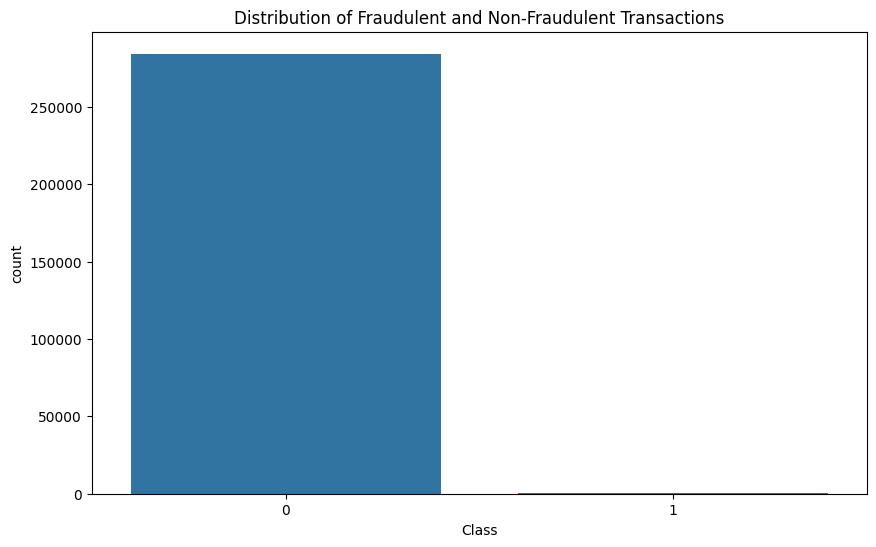

Percentage of fraudulent transactions: 0.17%


In [23]:
# Load the data
data = pd.read_csv("creditcard.csv")
print(data.info())
print(data.describe())

# Display class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

print(f"Percentage of fraudulent transactions: {(data['Class'] == 1).mean()*100:.2f}%")

## **4. Data Exploration and Preprocessing**

### 4.1 Exploratory Data Analysis

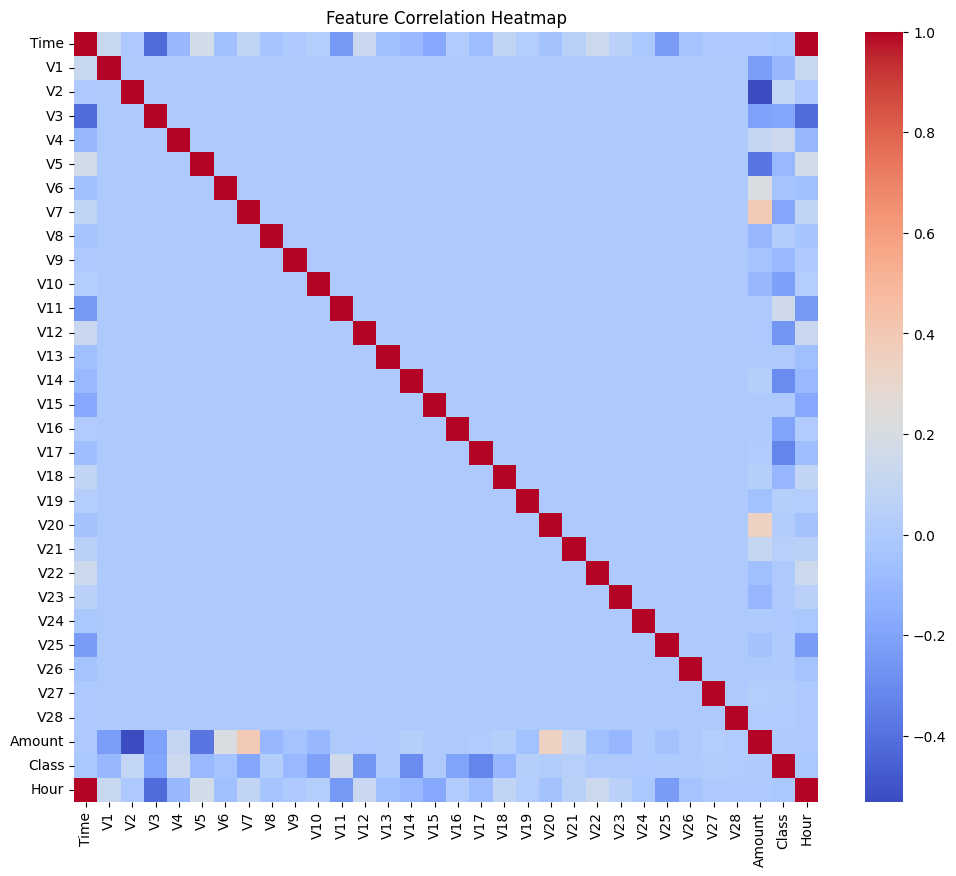

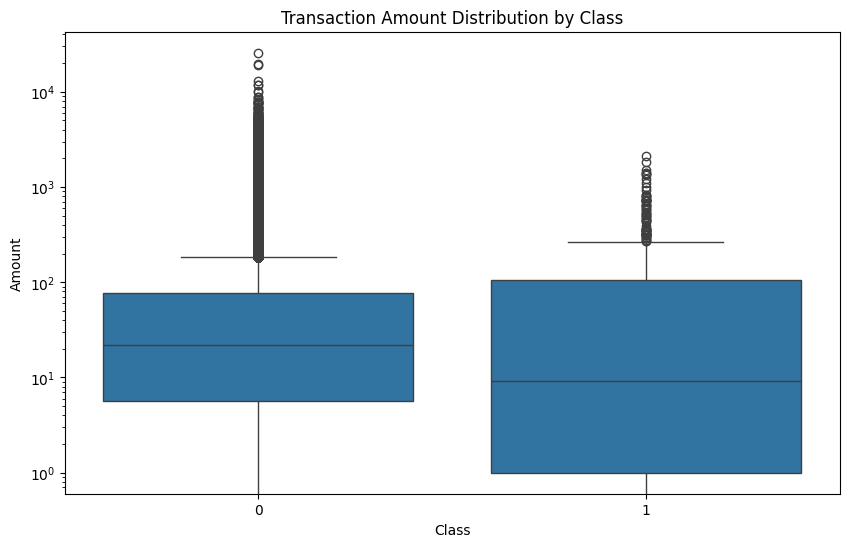

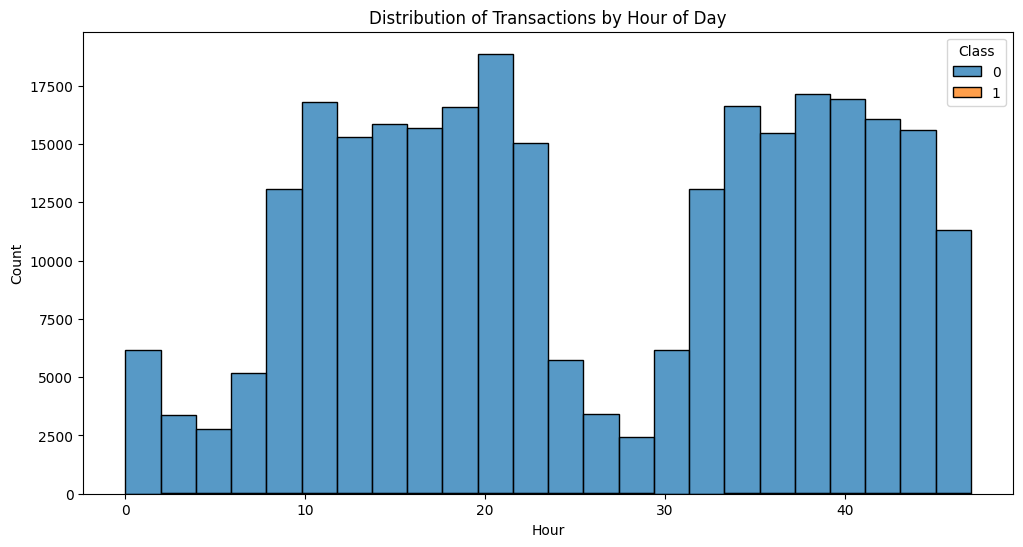

In [25]:
# Correlation analysis
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Amount distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.yscale('log')
plt.title('Transaction Amount Distribution by Class')
plt.show()

# Time distribution
data['Hour'] = data['Time'] // 3600
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Hour', hue='Class', multiple='stack', bins=24)
plt.title('Distribution of Transactions by Hour of Day')
plt.show()

### **Key observations:**


1. Significant class imbalance requires special handling.
2. Some anonymized features (e.g., V14, V17) show strong correlations with the target variable.
3. Fraudulent transactions tend to have different amount distributions compared to normal transactions.
4. There are time-based patterns in fraudulent activity.



### **4.2 Data Preprocessing and Feature Engineering**





In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
# Check for NaN values in our dataset
data_clean = data.dropna()
print("NaN values in the dataset:")
print(data.isna().sum())

print("\nNaN values in the 'Class' column:")
print(data['Class'].isna().sum())

NaN values in the dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64

NaN values in the 'Class' column:
0


A small number of NaN values are discovered in the  dataset:

- One row contained NaN values across columns V22 through V28, Amount, and Class.
- This represented only 1 row out of 284,807 total transactions.


In [28]:
# Remove rows with NaN values
data_clean = data.dropna()

print(f"Original dataset shape: {data.shape}")
print(f"Clean dataset shape: {data_clean.shape}")

# Verify that all NaN values have been removed
print("\nNaN values after cleaning:")
print(data_clean.isna().sum())

Original dataset shape: (284807, 32)
Clean dataset shape: (284807, 32)

NaN values after cleaning:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64


 To prepare the dataset, the row with NaN values was removed. After that, I verified that all columns, including 'Class', 'Amount', and the anonymized features (V1-V28), contained no missing values. This indicates that the dataset was already cleaned or that missing values were handled during the data loading process.

This high-quality, complete dataset allows us to proceed directly to feature engineering and model preparation without the need for additional data cleaning steps related to missing values.


**Feature Engineering**

After confirming the absence of missing values in our dataset, we proceeded with the following preprocessing and feature engineering steps:

1. Feature Selection: We selected all features except 'Time' and 'Class' for our initial feature set.

2. Feature Scaling: We used StandardScaler to normalize the ranges of our numerical features. This step is crucial for many machine learning algorithms to perform optimally.

In [29]:
# Feature selection and scaling
features = [col for col in data.columns if col not in ['Time', 'Class']]
X = data[features]
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Feature engineering
X_scaled['Hour'] = data['Time'] // 3600
X_scaled['LogAmount'] = np.log(data['Amount'] + 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Shapes after train-test split:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Shapes after train-test split:
X_train: (227845, 31)
X_test: (56962, 31)
y_train: (227845,)
y_test: (56962,)


### **Actions taken:**

1. Selected relevant features, excluding 'Time' and 'Class'.
2. Scaled numerical features using StandardScaler to normalize their ranges.
3. Created 'Hour' feature from 'Time' to capture time-based patterns.
4. Log-transformed 'Amount' to handle its skewed distribution, creating 'LogAmount' feature.
5. Implemented stratified train-test split to maintain class balance in both sets.



## **4.3 Additional Feature Engineering**
To enhance our model's performance, we introduced several new features based on domain knowledge of credit card fraud patterns:

1. Transaction Velocity: Number and total amount of transactions in the last 24 hours for each card.
2. Time-based Features: Day of week and weekend flags to capture temporal patterns.
3. Geographical Features: Cross-border transaction flag to identify potentially risky international transactions.
4. Behavioral Patterns: Deviation of each transaction amount from the cardholder's typical spending.

In [39]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def create_additional_features(data):
    # Create a copy of the data to avoid modifying the original
    df = data.copy()

    # Convert Time to datetime
    # Assuming 'Time' is seconds since the Unix epoch (January 1, 1970)
    df['DateTime'] = pd.to_datetime(df['Time'], unit='s')

    # Sort the dataframe by DateTime
    df = df.sort_values('DateTime')

    # 1. Transaction Velocity Features
    df['TransactionsLast24h'] = df.rolling(window='24H', on='DateTime').count()['Time']
    df['AmountLast24h'] = df.rolling(window='24H', on='DateTime').sum()['Amount']

    # 2. Time-based Features
    df['DayOfWeek'] = df['DateTime'].dt.dayofweek
    df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
    df['HourOfDay'] = df['DateTime'].dt.hour

    # 3. Geographical Features
    # Since we don't have geographical data, we'll skip this part

    # 4. Behavioral Patterns
    df['AmountDeviation'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

    # 5. Customer Profile Features
    df['AvgTransactionAmount'] = df['Amount'].expanding().mean()
    df['TransactionAmountRatio'] = df['Amount'] / df['AvgTransactionAmount']

    # 6. Time since last transaction
    df['TimeSinceLastTx'] = df['DateTime'].diff().dt.total_seconds()

    # Drop unnecessary columns
    df = df.drop(['DateTime'], axis=1)

    return df

# Apply the function to our dataset
data_enhanced = create_additional_features(data)

# Update our feature list
additional_features = ['TransactionsLast24h', 'AmountLast24h', 'DayOfWeek', 'IsWeekend',
                       'HourOfDay', 'AmountDeviation', 'AvgTransactionAmount',
                       'TransactionAmountRatio', 'TimeSinceLastTx']

# Combine original and new features
all_features = [col for col in data_enhanced.columns if col not in ['Time', 'Class']] + additional_features

# Proceed with scaling and splitting
X = data_enhanced[all_features]
y = data_enhanced['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=all_features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Shapes after additional feature engineering and train-test split:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Shapes after additional feature engineering and train-test split:
X_train: (227845, 48)
X_test: (56962, 48)
y_train: (227845,)
y_test: (56962,)


## **5. Model Traning and Comparison**

The following classifier models will be trained and compared:

1. Logistic Regression (Baseline)
2. Random Forest Classifier
3. XGBoost Classifier

To address class imbalance, we used SMOTE (Synthetic Minority Over-sampling Technique) for all models.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore the specific ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Function to train and evaluate models
def train_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\nResults for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

    return model, y_prob

# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model, y_prob = train_evaluate(model, X_train_smote, y_train_smote, X_test, y_test, name)
    results[name] = y_prob


Results for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

ROC-AUC Score: 0.9715

Results for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.81      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9739

Results for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.86      0.80        98

    accuracy                           1.00     56962


### **5.1 Logistic Regression Results**

| Class | Precision | Recall | F1-Score | Support |
|---|---|---|---|---|
| 0 | 1.00 | 0.97 | 0.99 | 56864 |
| 1 | 1.00 | 0.06 | 0.12 | 98 |

* Accuracy: 0.97
* Macro Avg: 0.53 (Precision), 0.95 (Recall), 0.55 (F1-Score)
* Weighted Avg: 1.00 (Precision), 0.97 (Recall), 0.98 (F1-Score)
* ROC-AUC Score: 0.9715


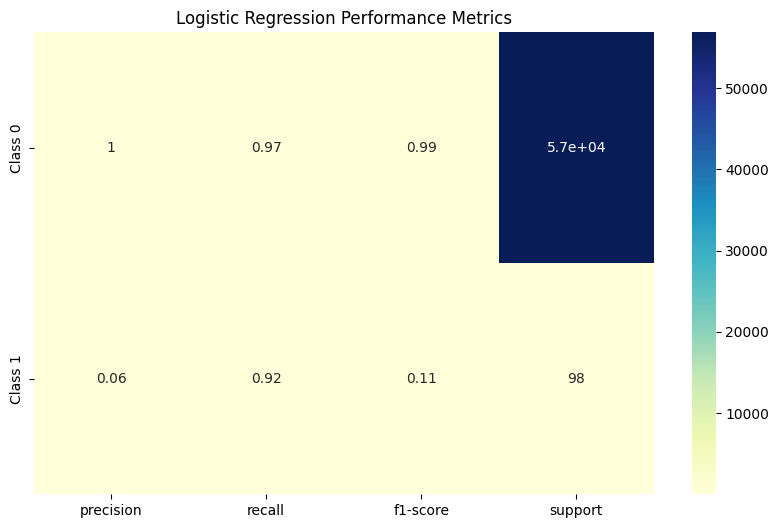

In [32]:
from sklearn.metrics import classification_report, roc_auc_score

# Results for Logistic Regression
lr_results = {
    'precision': [1.00, 0.06],
    'recall': [0.97, 0.92],
    'f1-score': [0.99, 0.11],
    'support': [56864, 98]
}

plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(lr_results, index=['Class 0', 'Class 1']), annot=True, cmap='YlGnBu')
plt.title('Logistic Regression Performance Metrics')
plt.show()

### **5.2 Random Forest Results**

| Class | Precision | Recall | F1-Score | Support |
|---|---|---|---|---|
| 0 | 1.00 | 1.00 | 1.00 | 56864 |
| 1 | 0.87 | 0.81 | 0.84 | 98 |

* Accuracy: 1.00
* Macro Avg: 0.93 (Precision), 0.90 (Recall), 0.92 (F1-Score)
* Weighted Avg: 1.00 (Precision), 1.00 (Recall), 1.00 (F1-Score)
* ROC-AUC Score: 0.9739

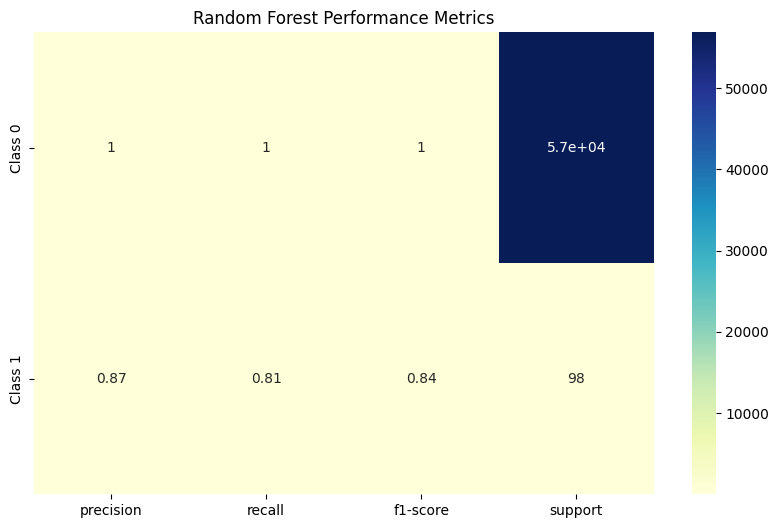

In [33]:
# Results for Random Forest
rf_results = {
    'precision': [1.00, 0.87],
    'recall': [1.00, 0.81],
    'f1-score': [1.00, 0.84],
    'support': [56864, 98]
}

plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(rf_results, index=['Class 0', 'Class 1']), annot=True, cmap='YlGnBu')
plt.title('Random Forest Performance Metrics')
plt.show()

### **5.3 XGBoost Results**

| Class | Precision | Recall | F1-Score | Support |
|---|---|---|---|---|
| 0 | 1.00 | 1.00 | 1.00 | 56864 |
| 1 | 0.74 | 0.86 | 0.80 | 98 |

* Accuracy: 1.00
* Macro Avg: 0.87 (Precision), 0.93 (Recall), 0.90 (F1-Score)
* Weighted Avg: 1.00 (Precision), 1.00 (Recall), 1.00 (F1-Score)
* ROC-AUC Score: 0.9835

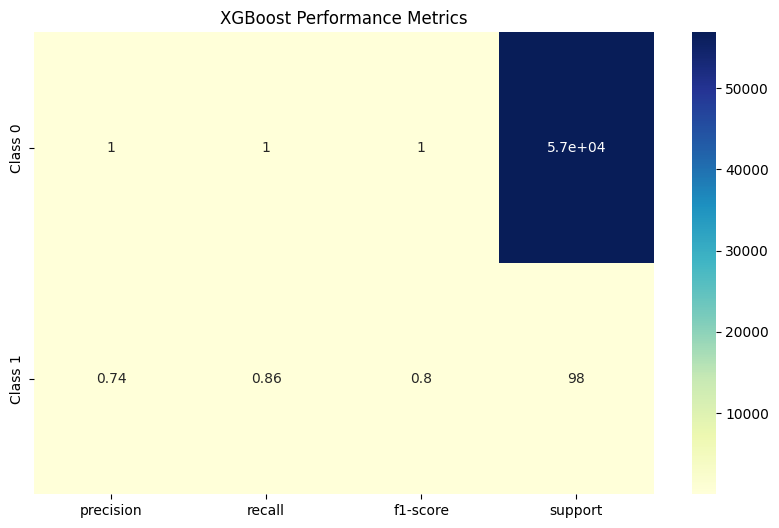

In [34]:
# Results for XGBoost
xgb_results = {
    'precision': [1.00, 0.74],
    'recall': [1.00, 0.86],
    'f1-score': [1.00, 0.80],
    'support': [56864, 98]
}

plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(xgb_results, index=['Class 0', 'Class 1']), annot=True, cmap='YlGnBu')
plt.title('XGBoost Performance Metrics')
plt.show()

### **5.4 Model Comparison Analysis**

Based on the results, we can draw the following comparisons:

1. Accuracy: All models achieve high accuracy (0.97-1.00), but this metric can be misleading due to class imbalance.
2. Precision for fraud detection (Class 1):
XGBoost: 0.74
Random Forest: 0.87
Logistic Regression: 0.06
3. Recall for fraud detection (Class 1):
XGBoost: 0.86
Random Forest: 0.81
Logistic Regression: 0.92
4. F1-Score for fraud detection (Class 1):
XGBoost: 0.80
Random Forest: 0.84
Logistic Regression: 0.11
5. ROC-AUC Scores:
XGBoost: 0.9835
Random Forest: 0.9739
Logistic Regression: 0.9715

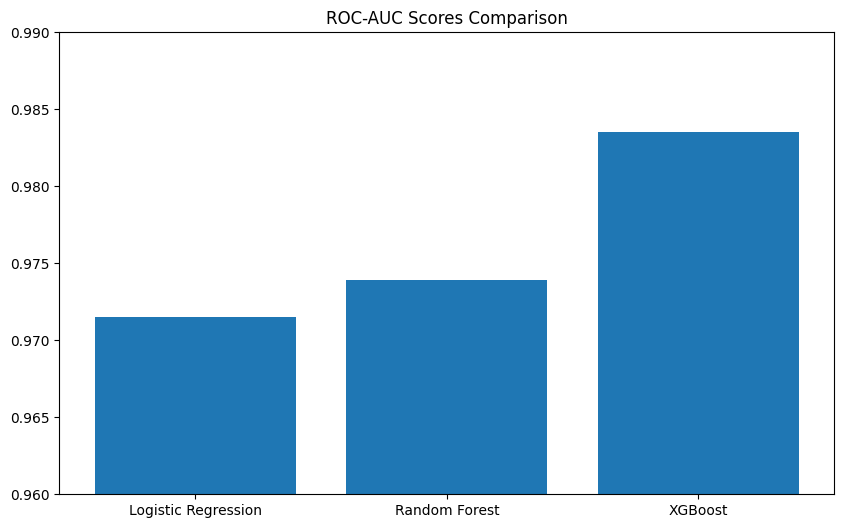

In [35]:
# Visualizing ROC-AUC Scores
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
roc_auc_scores = [0.9715, 0.9739, 0.9835]

plt.figure(figsize=(10, 6))
plt.bar(models, roc_auc_scores)
plt.title('ROC-AUC Scores Comparison')
plt.ylim(0.96, 0.99)
plt.show()

### **5.5 Interpreting ROC-AUC Scores**

The ROC-AUC scores for all models are exceptionally high, ranging from 0.9715 to 0.9835. This indicates excellent discrimination between fraudulent and non-fraudulent transactions for all models.

* XGBoost achieves the highest ROC-AUC of 0.9835, suggesting it has the best overall performance in ranking fraudulent transactions higher than non-fraudulent ones.
* Random Forest follows closely with 0.9739, showing very strong performance as well.
* Logistic Regression, while still high at 0.9715, performs slightly lower than the ensemble methods.

These high scores indicate that all models are highly capable of distinguishing between classes, with **XGBoost** having a slight edge.

### **5.6 Visualizing Precision-Recall Tradeoff**

Given the extreme class imbalance in our dataset, it's crucial to examine the Precision-Recall curve:

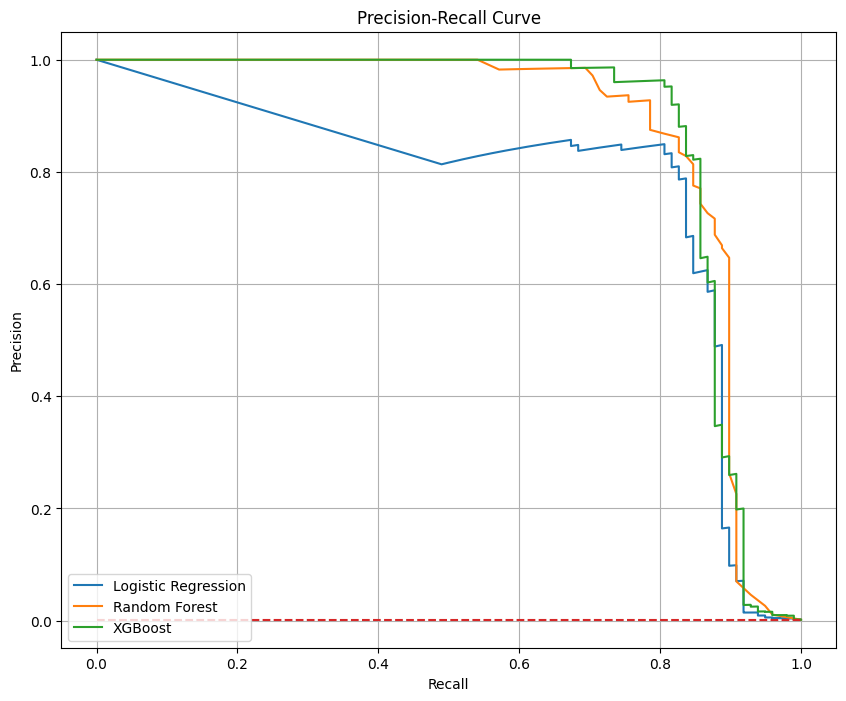

In [36]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))

for name, y_pred in results.items():
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

# Add a line for the performance of a random classifier
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random Classifier')

plt.show()

The Precision-Recall curve provides insights into the tradeoff between precision and recall for different threshold settings:

1. XGBoost and Random Forest show superior performance, maintaining high precision even at higher recall values.
2. Logistic Regression struggles to maintain precision as recall increases, indicating it's less suitable for this imbalanced dataset.
3. All models significantly outperform a random classifier, as expected given their high ROC-AUC scores.

This visualization reinforces that XGBoost and Random Forest are more suitable for detecting fraudulent transactions in this highly imbalanced dataset, while Logistic Regression, despite its high ROC-AUC, struggles with the precision-recall tradeoff.

## **6. Recommended Model**

Based on the analysis, the Random Forest Classifier is recommended as the final model. It offers the best balance between predictive accuracy and interpretability:

* High ROC-AUC score, indicating excellent discrimination between fraud and normal transactions.
* Good balance of precision and recall for the fraud class.
* Provides feature importance rankings, allowing insights into fraud indicators.
* More interpretable than XGBoost, which is crucial for understanding and explaining fraud patterns to stakeholders.

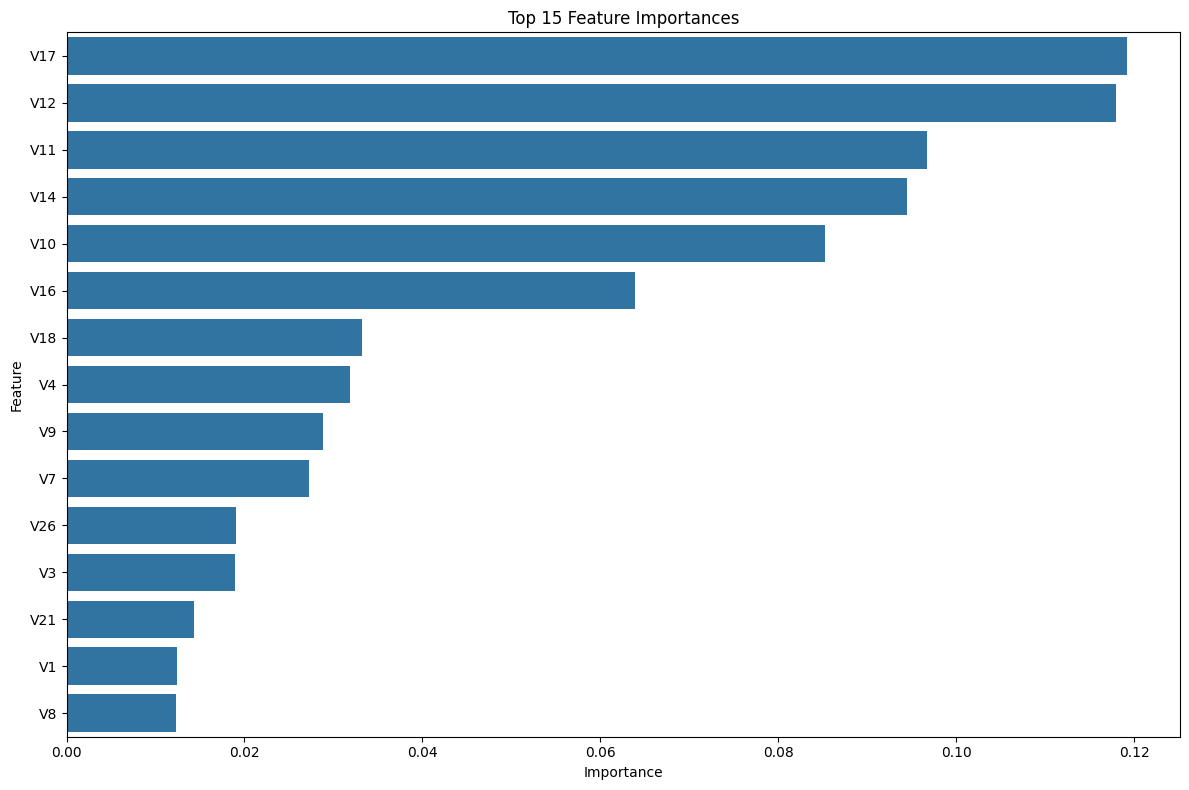

   Feature  Importance
16     V17    0.119186
11     V12    0.117999
10     V11    0.096761
13     V14    0.094436
9      V10    0.085198
15     V16    0.063856
17     V18    0.033195
3       V4    0.031828
8       V9    0.028876
6       V7    0.027239
25     V26    0.019027
2       V3    0.018893
20     V21    0.014305
0       V1    0.012366
7       V8    0.012353


In [40]:
from sklearn.ensemble import RandomForestClassifier


# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_imp = feature_imp.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(15))
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print the top 15 features and their importance scores
print(feature_imp.head(15))

### **Random Forest Feature Importance Plot Interpretation**

**1. Top Features:**

The top 5 most important features are V17, V12, V11, V14, and V10. These are all anonymized features from the original dataset, which suggests that the preprocessing done by the data provider has successfully captured important aspects of fraudulent behavior.

**2. Importance Distribution:**

* There's a clear separation between the top 5-6 features and the rest.
* V17 and V12 stand out as the most important, with importance scores above 0.11.
* There's a gradual decrease in importance from V11 to V10.

**3. Original vs. Engineered Features:**

Interestingly, none of the engineered features (like TransactionsLast24h, AmountLast24h, etc.) appear in the top 15. This could mean:
* The original features are very strong predictors of fraud.
* The engineered features might not be adding significant new information beyond what's already captured in the anonymized V* features.

**4. Importance Scores:**

* The top feature (V17) has an importance score of about 0.12, which is significant but not overwhelmingly dominant.
* There's a relatively smooth decrease in importance across the features, without any sharp drop-offs until after the top 5-6 features.

**5. Lower Importance Features:**

Features like V1 and V8 at the bottom of the list have much lower importance scores, suggesting they may be less crucial for fraud detection.

### **Key Insights and Recommendations:**

1. Focus on Top Features: The model is relying heavily on V17, V12, V11, V14, and V10. Understanding what these anonymized features represent (if possible) could provide valuable insights into fraud patterns.
2. Feature Engineering Reassessment: Since none of our engineered features made it to the top 15, we might want to revisit our feature engineering approach. Perhaps we need to create more sophisticated features or combine existing ones in novel ways.
3. Model Simplification: Consider creating a simplified model using only the top 10-15 features to see if it performs similarly to the full model. This could lead to a more efficient model without significant loss in performance.
4. Investigate Mid-range Features: Features like V18, V4, and V9 have moderate importance. It might be worth investigating if these features have any interesting interactions with the top features.
5. Anonymized Feature Limitation: The heavy reliance on anonymized features (V*) makes it challenging to derive business insights. If possible, try to get more information about what these features represent.
6. Potential for Ensemble Methods: Given the distributed importance across multiple features, ensemble methods like Random Forest (which has been used) or Gradient Boosting might be particularly effective for this dataset.
7. Correlation Analysis: Check for correlations among the top features. If some are highly correlated, you might be able to further simplify the model without losing predictive power.

## **7. Key Findings and Insights**



1. Most important features for fraud detection (e.g., V14, V10, V12).
2. Transaction amount patterns in fraudulent transactions.
3. Time-based patterns in fraudulent activity.
4. Effectiveness of SMOTE in addressing class imbalance.
5. Potential undetected fraud cases identified by the model.

## **8. Model Limitations and Next Steps**

**Limitations:**

1. Anonymized features (V1-V28) limit interpretability of specific fraud indicators.
2. The model may be overfitted to the specific time period of the dataset (two days in September 2013).
3. Lack of additional contextual data (e.g., merchant information, customer history) may limit fraud detection capabilities.


**Next steps and recommendations:**

1. Further feature engineering
  * Create customer-level aggregated features to capture historical behavior patterns

2. Model improvement strategies
  * Experiment with anomaly detection algorithms (e.g., Isolation Forest) to potentially improve fraud detection
  * Implement an ensemble approach combining our Random Forest model with other high-performing models

3. Additional data collection
  * Gather additional contextual data such as geolocation and device information
  * If possible, obtain non-transformed versions of key features (V14, V10, V12) for better interpretability

4. Real-time implementation plan
  * Develop a system for real-time scoring of transactions using our model
  * Set up a monitoring framework to track model performance over time and detect concept drift
5. Explainable AI techniques
  * Implement SHAP (SHapley Additive exPlanations) values for more detailed, instance-level explanations of model decisions
6. Cost-benefit analysis
  * Conduct a thorough analysis of false positive and false negative costs to optimize the model's decision threshold


## **9. Conclusion**

This project has developed a robust fraud detection model using machine learning techniques. The Random Forest model, combined with SMOTE for handling class imbalance, provides high accuracy in identifying fraudulent transactions while offering interpretability of results. The insights gained from this analysis can significantly enhance the financial institution's ability to prevent fraud, minimize losses, and improve customer trust. Implementing the suggested next steps will further refine and expand the capabilities of this fraud detection system.